# 本章學習如何利用 matplotlib 畫出甘特圖

案例：想要知道平常客服進來的 peak hour，以及平均一個客服處理的時間長度，找出合適的班表

In [41]:
# You may create a PolyCollection of "bars". For this you would need to convert your dates to numbers (matplotlib.dates.date2num).
import pandas as pd
# import datetime as dt
from matplotlib import font_manager
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection

# data source https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
df = pd.read_csv("./res/fhv_tripdata_2019-06.csv")
print(df.dtypes)

# convert pickup_datetime object type to datetime64
df['start'] = pd.to_datetime(df['pickup_datetime'])
df['end'] = pd.to_datetime(df['dropoff_datetime'])

df['diff_min'] = (df['end'].values - df['start'].values).astype('<m8[m]').astype(int)

print(df.dtypes)
df.head(10)

dispatching_base_num     object
pickup_datetime          object
dropoff_datetime         object
PULocationID              int64
DOLocationID              int64
SR_Flag                 float64
dtype: object
dispatching_base_num            object
pickup_datetime                 object
dropoff_datetime                object
PULocationID                     int64
DOLocationID                     int64
SR_Flag                        float64
start                   datetime64[ns]
end                     datetime64[ns]
diff_min                         int64
dtype: object


,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,start,end,diff_min
0,B00013,2019-06-01 00:51:33,2019-06-01 01:20:07,264,264,NaN,2019-06-01 00:51:33,2019-06-01 01:20:07,28
1,B00013,2019-06-01 00:53:05,2019-06-01 01:09:38,264,264,NaN,2019-06-01 00:53:05,2019-06-01 01:09:38,16
2,B00013,2019-06-01 00:23:41,2019-06-01 00:56:29,264,264,NaN,2019-06-01 00:23:41,2019-06-01 00:56:29,32
3,B00013,2019-06-01 00:18:01,2019-06-01 00:19:48,264,264,NaN,2019-06-01 00:18:01,2019-06-01 00:19:48,1
4,B00014,2019-06-01 00:02:31,2019-06-01 00:16:03,264,264,NaN,2019-06-01 00:02:31,2019-06-01 00:16:03,13
5,B00014,2019-06-01 00:19:09,2019-06-02 00:48:15,264,264,NaN,2019-06-01 00:19:09,2019-06-02 00:48:15,1469
6,B00014,2019-06-01 00:57:24,2019-06-01 01:17:52,264,264,NaN,2019-06-01 00:57:24,2019-06-01 01:17:52,20
7,B00014,2019-06-01 00:05:32,2019-06-02 00:30:33,264,264,NaN,2019-06-01 00:05:32,2019-06-02 00:30:33,1465
8,B00014,2019-06-01 00:01:20,2019-06-02 00:53:03,264,264,NaN,2019-06-01 00:01:20,2019-06-02 00:53:03,1491
9,B00021,2019-06-01 00:10:01,2019-06-01 00:19:19,56,56,NaN,2019-06-01 00:10:01,2019-06-01 00:19:19,9


In [25]:
df_debug = df.copy()
# df_debug = df[df.dispatching_base_num == 'B00013'] and df[df.dispatching_base_num == 'B00014']
df_debug = df_debug.loc[df['dispatching_base_num'].isin(['B00013','B00014'])]
df_debug = df_debug[df_debug.diff_min <= 100]
df_debug.head(10)

,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,start,end,diff_min
0,B00013,2019-06-01 00:51:33,2019-06-01 01:20:07,264,264,NaN,2019-06-01 00:51:33,2019-06-01 01:20:07,28
1,B00013,2019-06-01 00:53:05,2019-06-01 01:09:38,264,264,NaN,2019-06-01 00:53:05,2019-06-01 01:09:38,16
2,B00013,2019-06-01 00:23:41,2019-06-01 00:56:29,264,264,NaN,2019-06-01 00:23:41,2019-06-01 00:56:29,32
3,B00013,2019-06-01 00:18:01,2019-06-01 00:19:48,264,264,NaN,2019-06-01 00:18:01,2019-06-01 00:19:48,1
4,B00014,2019-06-01 00:02:31,2019-06-01 00:16:03,264,264,NaN,2019-06-01 00:02:31,2019-06-01 00:16:03,13
6,B00014,2019-06-01 00:57:24,2019-06-01 01:17:52,264,264,NaN,2019-06-01 00:57:24,2019-06-01 01:17:52,20
1906,B00013,2019-06-01 01:11:40,2019-06-01 01:54:36,264,264,NaN,2019-06-01 01:11:40,2019-06-01 01:54:36,42
1907,B00014,2019-06-01 01:48:05,2019-06-01 02:16:31,264,264,NaN,2019-06-01 01:48:05,2019-06-01 02:16:31,28
1909,B00014,2019-06-01 01:56:35,2019-06-01 02:50:37,264,264,NaN,2019-06-01 01:56:35,2019-06-01 02:50:37,54
1910,B00014,2019-06-01 01:57:00,2019-06-01 02:14:04,264,264,NaN,2019-06-01 01:57:00,2019-06-01 02:14:04,17


In [26]:
user1 = df_debug[df_debug.dispatching_base_num == 'B00013'][['start','diff_min']]
bar_user1 = []
for i in range(len(user1.values)):
    starttime = pd.to_datetime(user1.values[i][0]).to_period('Min').ordinal
    bar_user1.append((starttime, user1.values[i][1]))

    
user2 = df[df.dispatching_base_num == 'B00014'][['start','diff_min']]
bar_user2 = []
for i in range(len(user2.values)):
    starttime = pd.to_datetime(user2.values[i][0]).to_period('Min').ordinal
    bar_user2.append((starttime, user2.values[i][1]))


In [ ]:
df[df['pickup_datetime']==df['pickup_datetime'].max()]

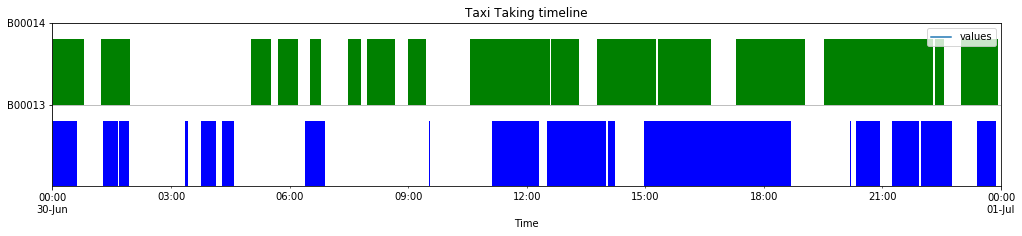

In [38]:
# https://stackoverflow.com/questions/24425908/matplotlib-how-to-use-timestamps-with-broken-barh
idx = pd.date_range('2019-06-30 00:00:00', '2019-07-01 00:00:00', freq='Min')
df = pd.DataFrame({'values': np.random.randn(len(idx))}, index=idx)
ax = df.plot(figsize=(17,3))

#################
h = 4
ax.broken_barh(bar_user1, (5, h), facecolors='blue')
ax.broken_barh(bar_user2, (10, h), facecolors='green')

ax.set_title("Taxi Taking timeline")
ax.set_ylim(5, 15)
ax.set_xlabel('Time')
ax.set_yticks([10, 15])
ax.set_yticklabels(['B00013', 'B00014'])
ax.grid(True)

plt.show()